In [35]:
# Dependencies
import requests
import logging
import pandas as pd

In [36]:
# Define URL parameters
league_id = "564698"
year = ['2023','2022','2021','2020','2019','2018']

In [37]:
swid = "{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}"
espn_s2 = "AEBMf%2FfmL20PESZFBMdSRkR9HHsxOE%2FvAirc8HkQxtgX9tbG8vsxqa8Qm83LNJam6rJeMAWfmMVt3b2EuNYu7%2FATa0vER%2FTQIfoZRRg4ItNjN8MkU%2FBdNeTsOGei2ZJDgGX3zWxfxkysoQgRaVkikEHDHZtxlY9ZBtk3NrSUE%2BlaTWzbsfsEGlIgNzN4YG4QuUV7GxteDw1hUd%2Fb2sfdvew0ypoKcXrE51OQL5AgdfnH144uN1YmgFd3nNdBe%2FBIadjuJ2TZ7LAzAI7z1P6x7QhiG1Ah7RMTEzO7MDzoLdMODQ%3D%3D"

In [39]:
seasons = []
for yr in year:
    url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/"+yr+"/segments/0/leagues/564698"
    matchup_response = requests.get(url, cookies={"swid": swid,
                          "espn_s2": espn_s2}, headers=headers,params={"view": "mMatchup"})
    matchup_json = matchup_response.json()
    df = [
    [
        game['matchupPeriodId'],
        game['home']['teamId'], 
        game['home'].get('totalPoints', 0),  # Using .get() to handle missing points
        game.get('away', {}).get('teamId', 'N/A'),  # Defaulting to 'N/A' if 'away' key is missing
        game.get('away', {}).get('totalPoints', 0)  # Defaulting to 0 if 'away' key or totalPoints is missing
    ]
    for game in matchup_json['schedule']
    ]
    df = pd.DataFrame(df, columns=['Week', 'HomeTeamId', 'HomeTotalPoints', 'AwayTeamId', 'AwayTotalPoints'])
    df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]
    df['Year'] = yr
    seasons.append(df)

In [41]:
df_sch = pd.concat(seasons)

In [54]:
seasons_tm = []
for yr in year:
    url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/"+yr+"/segments/0/leagues/564698"
    team_response = requests.get(url, cookies={"swid": swid,
                          "espn_s2": espn_s2},params={"view": "forTeamId"}, headers=headers)
    team_json = team_response.json()
    tm = [
    [
        team['abbrev'],
        team['id'],
        team['owners']
    ]
    for team in team_json['teams']
    ]
    
    tm1 = pd.DataFrame(tm, columns=['Abbr', 'TeamID','OwnerID'])
    tm1['Year'] = yr
    seasons_tm.append(tm1)

In [55]:
df_tm = pd.concat(seasons_tm)

In [57]:
team_response = requests.get(url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/2023/segments/0/leagues/564698", cookies={"swid": swid,
                          "espn_s2": espn_s2},params={"view": "mTeam"}, headers=headers)
team_json = team_response.json()

In [59]:
seasons_tm_1 = []
for yr in year:
    url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/"+yr+"/segments/0/leagues/564698"
    team_response = requests.get(url, cookies={"swid": swid,
                          "espn_s2": espn_s2},params={"view": "mTeam"}, headers=headers)
    team_json = team_response.json()
    tm = [
    [
        team['displayName'],
        team['firstName'],
        team['lastName'],
        team['id']
    ]
    for team in team_json['members']
    ]
    
    tm1 = pd.DataFrame(tm, columns=['DisplayName', 'First','Last','OwnerID'])
    tm1['Year'] = yr
    seasons_tm_1.append(tm1)

In [60]:
df_tm1 = pd.concat(seasons_tm_1)

In [61]:
df_tm1

,DisplayName,First,Last,OwnerID,Year
0,xanderotte11,alex,otte,{03C9941D-EDA5-4EFC-8994-1DEDA56EFCFE},2023
1,12gdylan,Dylan,Geissert,{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B},2023
2,jberkley13,Jacob,Berkley,{50E2DA25-1B8F-43E5-9641-B60117AAC2D5},2023
3,kmodd22,Kolby,Moddelmog,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},2023
4,ESPNFAN8114445208,Anthony,Otte,{5D63E7C9-7E73-45C5-AD19-EA232DB5B145},2023
...,...,...,...,...,...
6,JeffHeisman93,Jeff,Heitzman,{C5427153-E4B8-4907-8271-53E4B8090793},2018
7,DaboMiller,Dave,Miller,{D91C2ADF-A3E5-11D2-9B36-00A0C9862BBB},2018
8,Aotte11,Alex,Otte,{DA8634E8-1A57-4C72-8634-E81A575C72D8},2018
9,dustingeissert10,Dustin,Geissert,{E3731A1B-9AF8-4636-BBB8-E64E982D5916},2018


In [62]:
df_tm

,Abbr,TeamID,OwnerID,Year
0,SETH,1,[{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}],2023
1,HTZY,2,[{C5427153-E4B8-4907-8271-53E4B8090793}],2023
2,VGTS,3,[{EDC2966B-560E-4F4A-8296-6B560EAF4A80}],2023
3,SWAN,5,[{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}],2023
4,DYLN,6,[{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}],2023
5,MS,7,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],2023
6,Otte,9,"[{DA8634E8-1A57-4C72-8634-E81A575C72D8}, {03C9...",2023
7,ADO,10,[{5D63E7C9-7E73-45C5-AD19-EA232DB5B145}],2023
8,AC,11,[{84A6667B-5663-4540-A666-7B56637540ED}],2023
9,BERK,12,[{50E2DA25-1B8F-43E5-9641-B60117AAC2D5}],2023


,Abbr,TeamID
0,SETH,1
1,HTZY,2
2,VGTS,3
3,SWAN,5
4,DYLN,6
5,MS,7
6,Otte,9
7,ADO,10
8,AC,11
9,BERK,12


In [18]:
df = [
    [
        game['matchupPeriodId'],
        game['home']['teamId'], 
        game['home'].get('totalPoints', 0),  # Using .get() to handle missing points
        game.get('away', {}).get('teamId', 'N/A'),  # Defaulting to 'N/A' if 'away' key is missing
        game.get('away', {}).get('totalPoints', 0)  # Defaulting to 0 if 'away' key or totalPoints is missing
    ]
    for game in matchup_json['schedule']
]
df = pd.DataFrame(df, columns=['Week', 'HomeTeamId', 'HomeTotalPoints', 'AwayTeamId', 'AwayTotalPoints'])
df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]

In [21]:
df3 = df.assign(MarginH = df['HomeTotalPoints'] - df['AwayTotalPoints'],
                MarginA = df['AwayTotalPoints'] - df['HomeTotalPoints'])
df3_home = df3[['Week','Type', 'HomeTeamId', 'MarginH']].rename(columns={'HomeTeamId': 'Team', 'MarginH': 'Margin'})
df3_away = df3[['Week','Type', 'AwayTeamId', 'MarginA']].rename(columns={'AwayTeamId': 'Team', 'MarginA': 'Margin'})

df3 = pd.concat([df3_home, df3_away]).reset_index()



"df3 = (df3[['Week', 'HomeTeamId', 'MarginH', 'Type']]\n .rename(columns={'HomeTeamId': 'Team', 'MarginH': 'Margin'})\n .append(df3[['Week', 'AwayTeamId', 'MarginA', 'Type']]\n .rename(columns={'AwayTeamId': 'Team', 'MarginA': 'Margin'}))\n        )"

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df3['Team'].unique()

array([3, 6, 2, 5, 9, 1, 10, 12, 11, 7, 'N/A'], dtype=object)

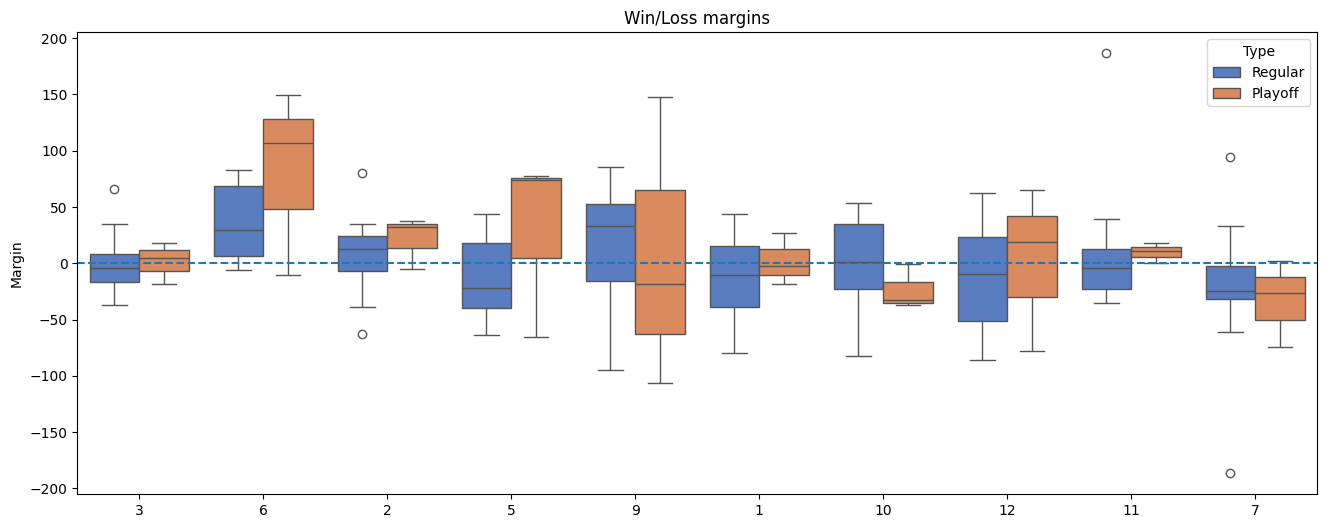

In [27]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
order = [3, 6, 2, 5, 9, 1, 10, 12, 11, 7,]
sns.boxplot(x='Team', y='Margin', hue='Type',
            data=df3,
            palette='muted',
            order=order)
ax.axhline(0, ls='--')
ax.set_xlabel('')
ax.set_title('Win/Loss margins')
plt.show()

In [87]:
#matchup_json

In [85]:
df = [[
        game['matchupPeriodId'],
        game['home']['teamId'], game['home']['totalPoints'],
        game['away']['teamId'], game['away']['totalPoints']
    ] for game in matchup_json['schedule']]
#df = pd.DataFrame(df, columns=['Week', 'Team1', 'Score1', 'Team2', 'Score2'])
#df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]
#df.head()

KeyError: 'away'

In [70]:
matchup_json

{'gameId': 1,
 'id': 564698,
 'members': [{'displayName': 'xanderotte11',
   'id': '{03C9941D-EDA5-4EFC-8994-1DEDA56EFCFE}',
   'isLeagueManager': False},
  {'displayName': '12gdylan',
   'id': '{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}',
   'isLeagueManager': False},
  {'displayName': 'jberkley13',
   'id': '{50E2DA25-1B8F-43E5-9641-B60117AAC2D5}',
   'isLeagueManager': False},
  {'displayName': 'kmodd22',
   'id': '{51A524D8-FAFA-439E-A524-D8FAFA939EE0}',
   'isLeagueManager': False},
  {'displayName': 'ESPNFAN8114445208',
   'id': '{5D63E7C9-7E73-45C5-AD19-EA232DB5B145}',
   'isLeagueManager': False},
  {'displayName': 'MicahSwank13',
   'id': '{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}',
   'isLeagueManager': False},
  {'displayName': 'Sethicus Millicus',
   'id': '{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}',
   'isLeagueManager': False},
  {'displayName': 'aclausing.AC',
   'id': '{84A6667B-5663-4540-A666-7B56637540ED}',
   'isLeagueManager': False},
  {'displayName': 'JeffHeisman93',
   'id

In [56]:
import requests

league_id = 564698
year = 2023
url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/" + \
      str(league_id) + "?seasonId=" + str(year)

r = requests.get(url)
d = r.json()[0]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fantasy.espn.com:443
DEBUG:urllib3.connectionpool:https://fantasy.espn.com:443 "GET /apis/v3/games/ffl/leagueHistory/564698?seasonId=2023 HTTP/1.1" 302 13
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.espn.com:443
DEBUG:urllib3.connectionpool:https://www.espn.com:443 "GET /fantasy/ HTTP/1.1" 403 919


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [55]:
try:
    matchup_data = matchup_response.json()
except ValueError:
    print("Response is not valid JSON. Here is the raw response:")
    print(matchup_response.text)

Response is not valid JSON. Here is the raw response:

	<!DOCTYPE html>
	<html class="no-icon-fonts" lang="en">
	<head>
		<meta http-equiv="content-type" content="text/html; charset=UTF-8" />
<meta http-equiv="x-ua-compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
<meta name="referrer" content="origin-when-cross-origin">
<link rel="canonical" href="https://www.espn.com/fantasy/" />
<title>Fantasy Games</title>
<meta name="description" content="Play ESPN fantasy games. Create or join a fantasy league. Use the ESPN Draft kit, read fantasy blogs, watch video, or listen to ESPN fantasy podcasts." />
<link rel="manifest" href="/manifest.json">
<meta property="fb:app_id" content="116656161708917" />
<meta property="og:site_name" content="ESPN.com" />
<meta property="og:url" content="https://www.espn.com/fantasy/" />
<meta property="og:title" content="Fantasy Games"/>
<meta property="og:description" content="Play 

In [40]:
try:
    matchup_data = matchup_response.json()
except ValueError:
    print("Response is not valid JSON. Here is the raw response:")
    print(matchup_response.text)

Response is not valid JSON. Here is the raw response:

	<!DOCTYPE html>
	<html class="no-icon-fonts" lang="en">
	<head>
		<meta http-equiv="content-type" content="text/html; charset=UTF-8" />
<meta http-equiv="x-ua-compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
<meta name="referrer" content="origin-when-cross-origin">
<link rel="canonical" href="https://www.espn.com/fantasy/" />
<title>Fantasy Games</title>
<meta name="description" content="Play ESPN fantasy games. Create or join a fantasy league. Use the ESPN Draft kit, read fantasy blogs, watch video, or listen to ESPN fantasy podcasts." />
<link rel="manifest" href="/manifest.json">
<meta property="fb:app_id" content="116656161708917" />
<meta property="og:site_name" content="ESPN.com" />
<meta property="og:url" content="https://www.espn.com/fantasy/" />
<meta property="og:title" content="Fantasy Games"/>
<meta property="og:description" content="Play 

In [4]:
# Transform both of the json outputs into DataFrames
matchup_df = pd.json_normalize(matchup_json[0]['schedule'])

team_df = pd.json_normalize(team_json[0]['teams'])

In [5]:
# Define the column names needed
matchup_column_names = {
    'matchupPeriodId':'Week', 
    'away.teamId':'Team1', 
    'away.totalPoints':'Score1',
    'home.teamId':'Team2', 
    'home.totalPoints':'Score2',
}

team_column_names = {
    'id':'id',
    'location':'Name1',
    'nickname':'Name2'
}

# Reindex based on column names defined above
matchup_df = matchup_df.reindex(columns=matchup_column_names).rename(columns=matchup_column_names)
team_df = team_df.reindex(columns=team_column_names).rename(columns=team_column_names)

In [6]:
# Add a new column for regular/playoff game based on week number
matchup_df['Type'] = ['Regular' if week<=13 else 'Playoff' for week in matchup_df['Week']]

# Concatenate the two name columns
team_df['Name'] = team_df['Name1'] + ' ' + team_df['Name2']

# Drop all columns except id and Name
team_df = team_df.filter(['id', 'Name'])

In [7]:
# (1) Rename Team1 column to id
matchup_df = matchup_df.rename(columns={"Team1":"id"})

# (1) Merge DataFrames to get team names instead of ids and rename Name column to Name1
matchup_df = matchup_df.merge(team_df, on=['id'], how='left')
matchup_df = matchup_df.rename(columns={'Name':'Name1'})

# (1) Drop the id column and reorder columns
matchup_df = matchup_df[['Week', 'Name1', 'Score1', 'Team2', 'Score2', 'Type']]

In [8]:
# (2) Rename Team1 column to id
matchup_df = matchup_df.rename(columns={"Team2":"id"})

# (2) Merge DataFrames to get team names instead of ids and rename Name column to Name2
matchup_df = matchup_df.merge(team_df, on=['id'], how='left')
matchup_df = matchup_df.rename(columns={'Name':'Name2'})

# (2) Drop the id column and reorder columns
matchup_df = matchup_df[['Week', 'Name1', 'Score1', 'Name2', 'Score2', 'Type']]

In [9]:
# Output the DataFrame to a csv
matchup_df.to_csv(f"{year}_matchups.csv")